# <span style="color:yellow">SET DIRECTORY WHERE THE FILE IS LOCATED

In [1]:
pwd #Specifies the path of the file being executed

'c:\\Users\\Kosta\\Desktop\\Python_Projects\\OTHER_PROJECTS\\Final _Assigment_Ravanos'

# <span style="color:yellow">IMPORT REQUIRED LIBRARIES FOR CODE EXECUTION

In [ ]:
#Libraries for data import and processing
import warnings
import numpy as np
import pandas as pd


#Libraries for plotting
import seaborn as sns
import matplotlib.cm as cm
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots


#Libraries for machine learning model training
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

# <span style="color:yellow">SET MODEL PRECISION

In [ ]:
#Set model precision
pd.set_option("display.precision", 2)

# <span style="color:yellow">IMPORT AND PROCESS THE FILE REQUIRED FOR ALGORITHM EXECUTION

In [4]:
#File recognition and import into the program
df = pd.read_csv('data/Credit Card Customer Data.csv')

#Create DataFrame
df.head() 

#Print the first five columns of the data
print(df.head())

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  


# <span style="color:yellow">SUMMARY PRESENTATION OF DATA BEFORE REMOVING INFINITE AND NaN VALUES


In [5]:
#Returns the total number of rows in the data file
len(df)

660

In [6]:
#Returns the column names of the data file
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [7]:
#Shows the data types contained in the file columns. The dataset consists of 7 columns with numeric data.
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [ ]:
#Sets variables with values 0 and 1 as categorical for presentation and understanding purposes. This command should be executed after cleaning infinite and NaN values, as the program cannot check for infinite values if categorical variables exist in the dataset.

#for column in df.columns:
    #if set(df[column].unique()) == {0, 1}:
        #df[column] = df[column].astype('category')

In [9]:
#Prints the column names and the data types they contain
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [10]:
#Prints the type of each variable in the dataset
print(df.dtypes)

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object


In [11]:
#Shows the correlation matrix of the dataset variables
df.corr()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.00,5.29e-02,0.68,0.74,4.06e-01,0.03,-6.84e-01
Customer Key,0.05,1.00e+00,0.07,-0.01,-5.60e-04,0.02,5.97e-03
Avg_Credit_Limit,0.68,6.86e-02,1.00,0.61,-1.00e-01,0.55,-4.14e-01
Total_Credit_Cards,0.74,-1.03e-02,0.61,1.00,3.16e-01,0.17,-6.51e-01
Total_visits_bank,0.41,-5.60e-04,-0.10,0.32,1.00e+00,-0.55,-5.06e-01
Total_visits_online,0.03,2.25e-02,0.55,0.17,-5.52e-01,1.00,1.27e-01
Total_calls_made,-0.68,5.97e-03,-0.41,-0.65,-5.06e-01,0.13,1.00e+00


# <span style="color:yellow">DATASET PROCESSING AND CLEANING OF INFINITE AND NaN VALUES


In [ ]:
#Checks if there are infinite values in the dataset
if np.any(np.isinf(df)):
    print("Data contains infinite values. Replacing them with NaN.")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
#Checks if there are NaN values in the dataset.
#If you run this command before presenting the data, the presentation will be without these values. It is better to run this command after presenting the data so models can run.
if df.isnull().values.any():
    print("Data contains NaN values. Please handle missing data before proceeding.")
    df.dropna(inplace=True)

# <span style="color:yellow">SUMMARY PRESENTATION OF DATA


In [14]:
#Returns the total number of rows in the data file
len(df)

660

In [15]:
#Returns the column names of the data file
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [16]:
#Shows the data types contained in the file columns. The dataset consists of 7 columns with numeric data.
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [ ]:
#Sets variables with values 0 and 1 as categorical for presentation and understanding purposes. In this dataset, there are no categorical variables for this command to be useful.
for column in df.columns:
    if set(df[column].unique()) == {0, 1}:
        df[column] = df[column].astype('category')

In [18]:
#Prints the column names and the data types they contain
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [19]:
#Prints the type of each variable in the dataset
print(df.dtypes)

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object


In [20]:
#Shows the correlation matrix of the dataset variables
df.corr()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.00,5.29e-02,0.68,0.74,4.06e-01,0.03,-6.84e-01
Customer Key,0.05,1.00e+00,0.07,-0.01,-5.60e-04,0.02,5.97e-03
Avg_Credit_Limit,0.68,6.86e-02,1.00,0.61,-1.00e-01,0.55,-4.14e-01
Total_Credit_Cards,0.74,-1.03e-02,0.61,1.00,3.16e-01,0.17,-6.51e-01
Total_visits_bank,0.41,-5.60e-04,-0.10,0.32,1.00e+00,-0.55,-5.06e-01
Total_visits_online,0.03,2.25e-02,0.55,0.17,-5.52e-01,1.00,1.27e-01
Total_calls_made,-0.68,5.97e-03,-0.41,-0.65,-5.06e-01,0.13,1.00e+00


# <span style="color:yellow">DESCRIPTIVE STATISTICS OF DATA

In [ ]:
#Removes columns that do not provide information for data analysis
df = df.drop(["Sl_No", 'Customer Key'] ,axis=1)

In [22]:
#Prints descriptive statistics for numeric variables
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.00,660.00,660.00,660.00,660.00
mean,34574.24,4.71,2.40,2.61,3.58
std,37625.49,2.17,1.63,2.94,2.87
min,3000.00,1.00,0.00,0.00,0.00
25%,10000.00,3.00,1.00,1.00,1.00
50%,18000.00,5.00,2.00,2.00,3.00
75%,48000.00,6.00,4.00,4.00,5.00
max,200000.00,10.00,5.00,15.00,10.00


In [23]:
#Prints descriptive statistics for all variables including categorical ones.
df.describe(include='all')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.00,660.00,660.00,660.00,660.00
mean,34574.24,4.71,2.40,2.61,3.58
std,37625.49,2.17,1.63,2.94,2.87
min,3000.00,1.00,0.00,0.00,0.00
25%,10000.00,3.00,1.00,1.00,1.00
50%,18000.00,5.00,2.00,2.00,3.00
75%,48000.00,6.00,4.00,4.00,5.00
max,200000.00,10.00,5.00,15.00,10.00


In [ ]:
#Prints descriptive statistics for categorical variables. This command is not necessary for this dataset as it does not contain categorical variables.
##df.describe(include=object)

In [25]:
#Alternative way to print descriptive statistics for a single variable
df.Total_Credit_Cards.describe()

count    660.00
mean       4.71
std        2.17
min        1.00
25%        3.00
50%        5.00
75%        6.00
max       10.00
Name: Total_Credit_Cards, dtype: float64

In [26]:
#Counts the total observations in a specific column of the dataset. The same can be done for all other columns.
df.Total_Credit_Cards.value_counts()

#Alternative syntax for printing the above code
#df["Total_Credit_Cards"].value_counts()

Total_Credit_Cards
4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: count, dtype: int64

# <span style="color:yellow">EXPLORATORY DATA ANALYSIS

<span style="color:blue">Histograms

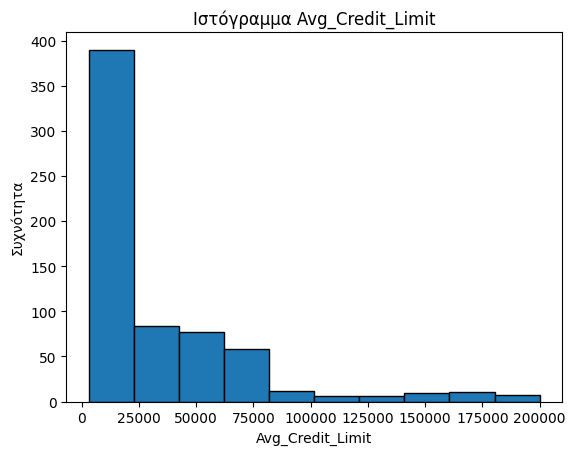

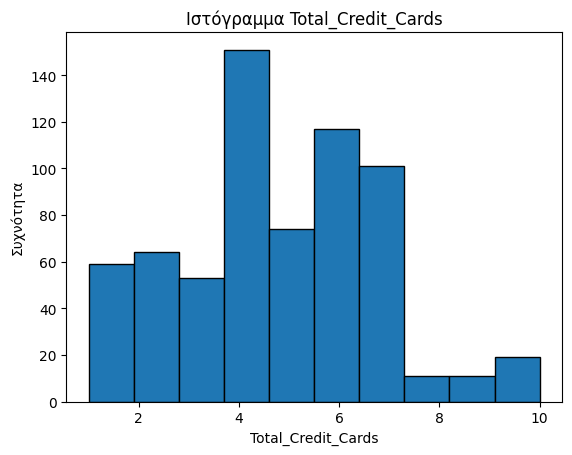

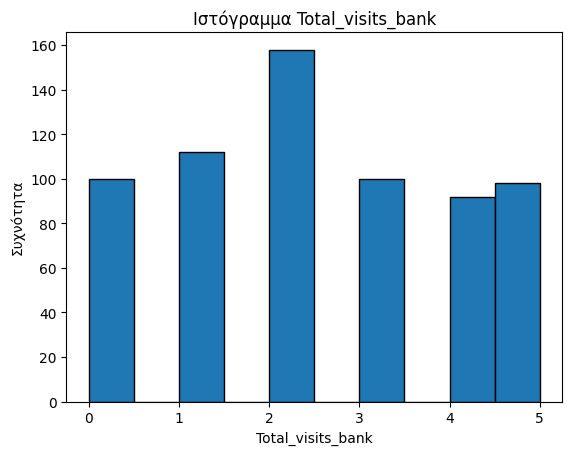

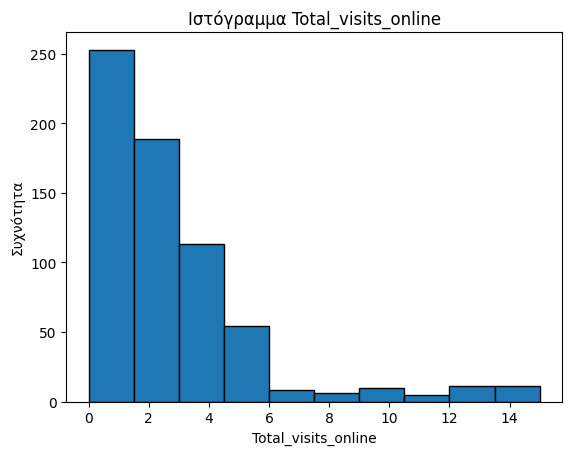

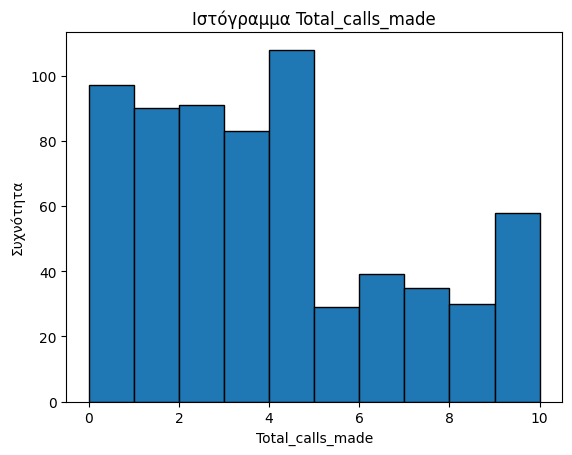

In [27]:
#Create histogram for 'Avg_Credit_Limit'
plt.hist(df['Avg_Credit_Limit'], bins=10, edgecolor='k')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Συχνότητα')
plt.title('Ιστόγραμμα Avg_Credit_Limit')
plt.show()

#Create histogram for 'Total_Credit_Cards'
plt.hist(df['Total_Credit_Cards'], bins=10, edgecolor='k')
plt.xlabel('Total_Credit_Cards')
plt.ylabel('Συχνότητα')
plt.title('Ιστόγραμμα Total_Credit_Cards')
plt.show()

#Create histogram for 'Total_visits_bank'
plt.hist(df['Total_visits_bank'], bins=10, edgecolor='k')
plt.xlabel('Total_visits_bank')
plt.ylabel('Συχνότητα')
plt.title('Ιστόγραμμα Total_visits_bank')
plt.show()

#Create histogram for 'Total_visits_online'
plt.hist(df['Total_visits_online'], bins=10, edgecolor='k')
plt.xlabel('Total_visits_online')
plt.ylabel('Συχνότητα')
plt.title('Ιστόγραμμα Total_visits_online')
plt.show()

#Create histogram for 'Total_calls_made'
plt.hist(df['Total_calls_made'], bins=10, edgecolor='k')
plt.xlabel('Total_calls_made')
plt.ylabel('Συχνότητα')
plt.title('Ιστόγραμμα Total_calls_made')
plt.show()

<span style="color:blue">Scatter plots with matplotlib

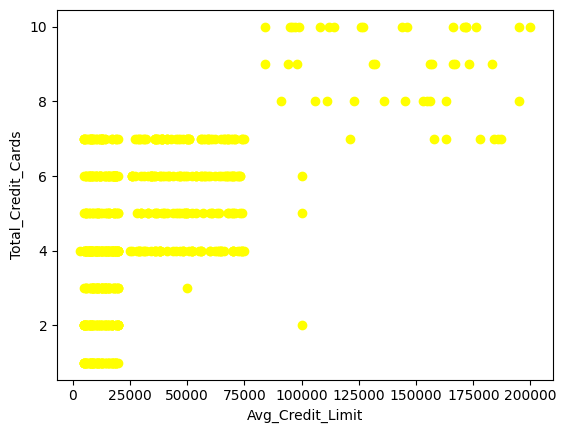

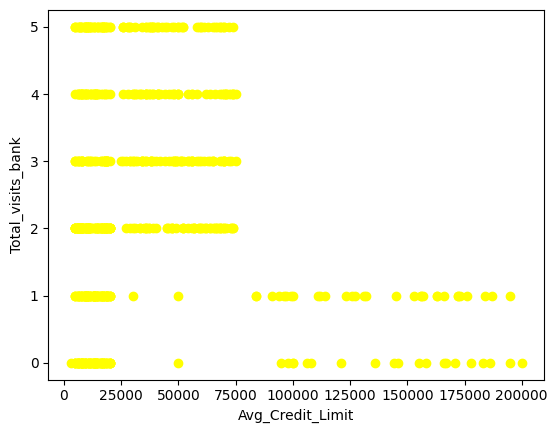

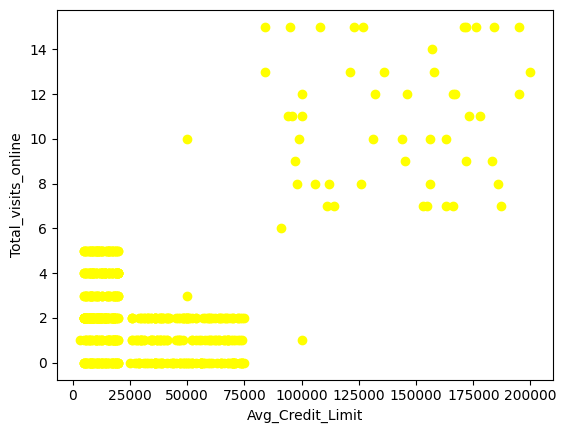

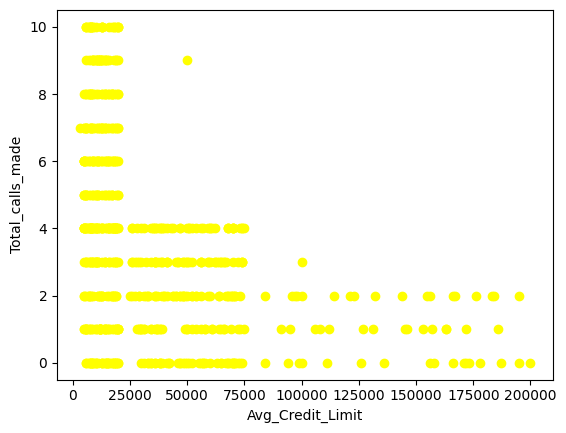

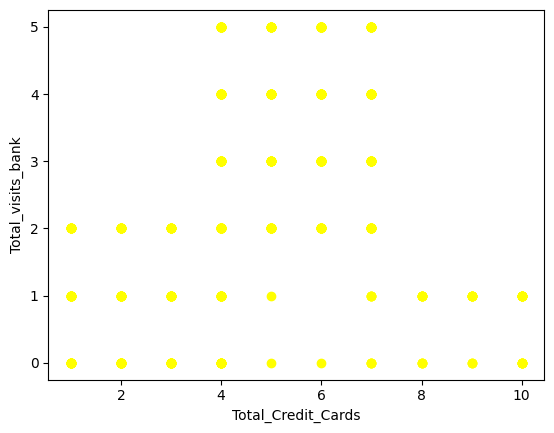

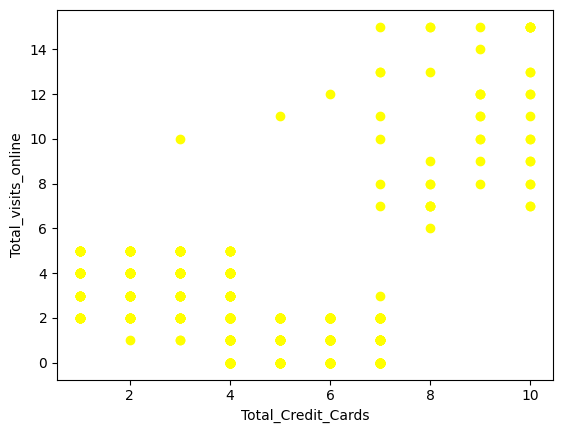

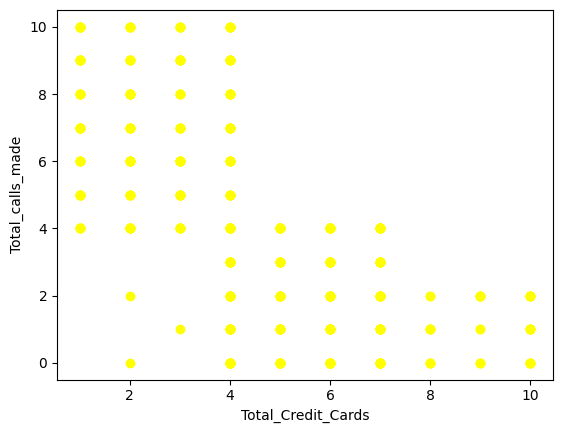

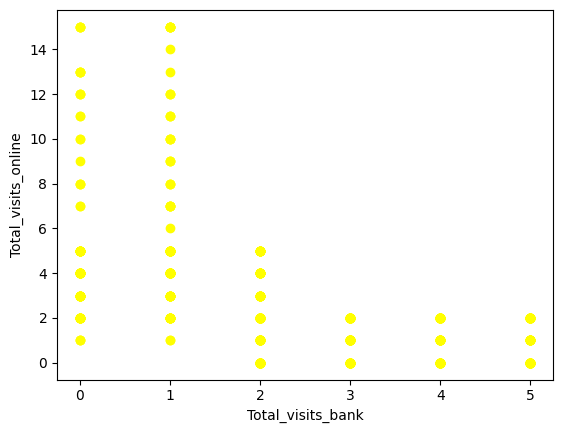

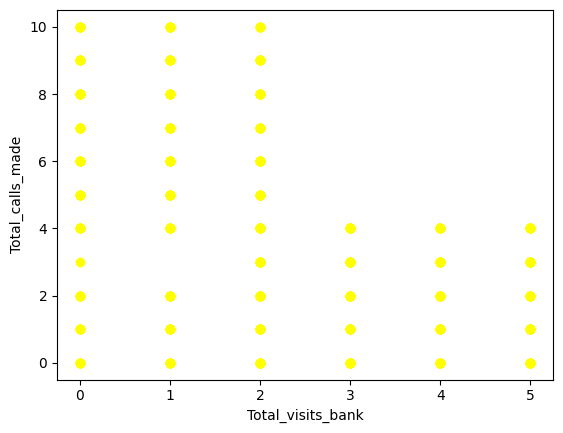

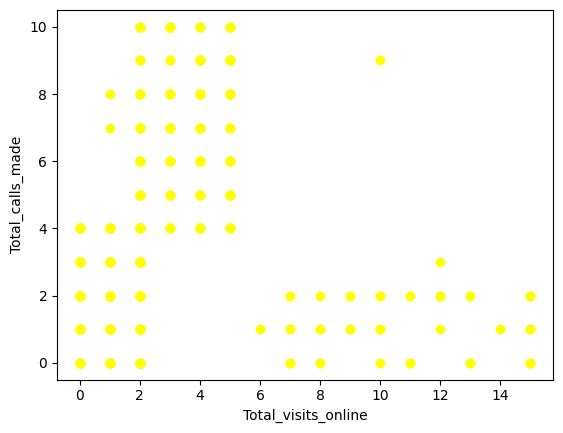

In [28]:
#This command is used to avoid creating separate commands for each scatter plot.
variables = df.columns

#Create scatter plots for variable pairs
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        plt.scatter(df[variables[i]], df[variables[j]], color='yellow')

    #Adjust axis labels
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])

        plt.show()

<span style="color:blue">Scatter plots with seaborn

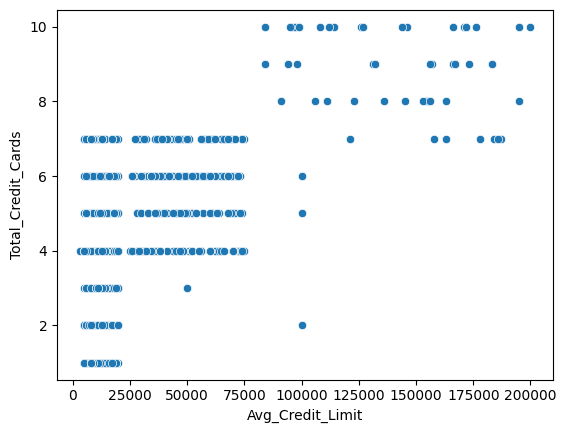

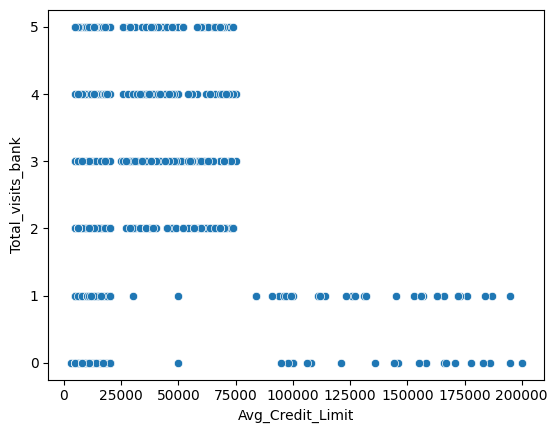

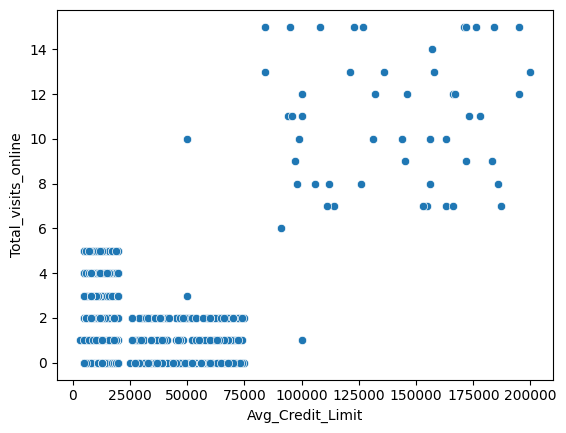

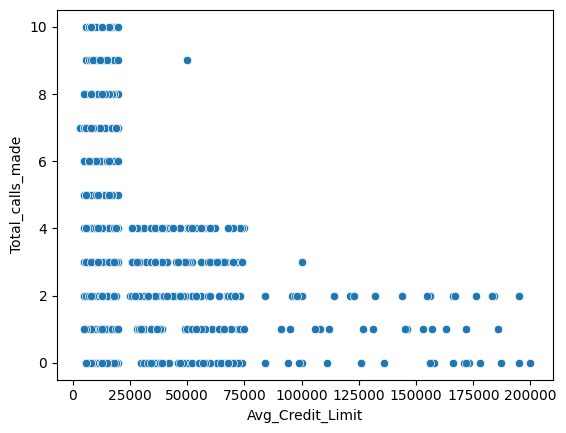

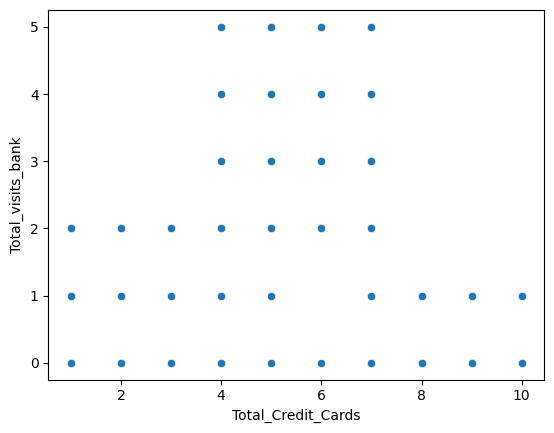

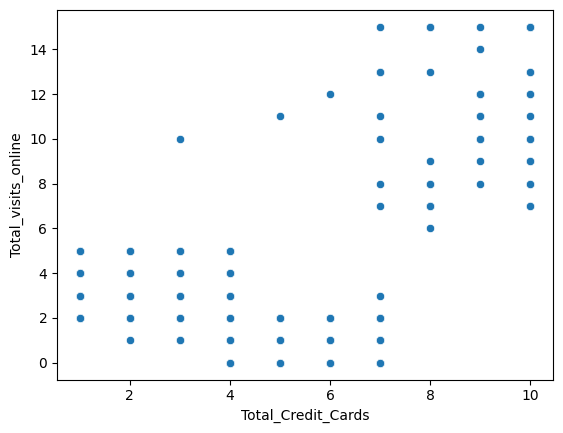

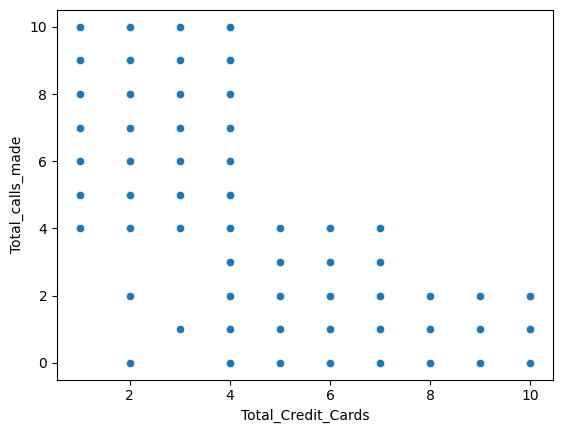

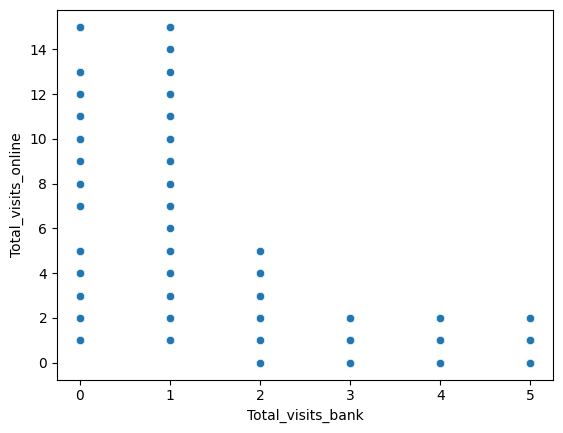

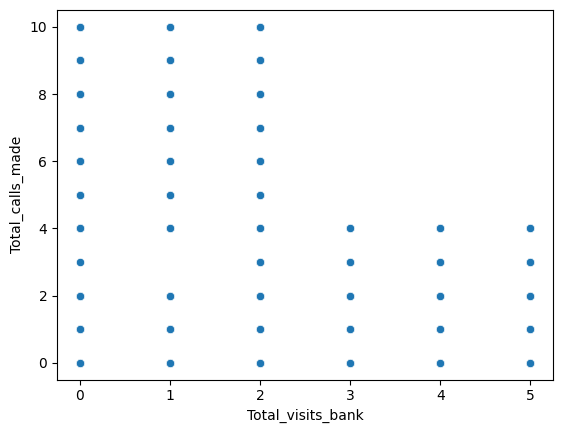

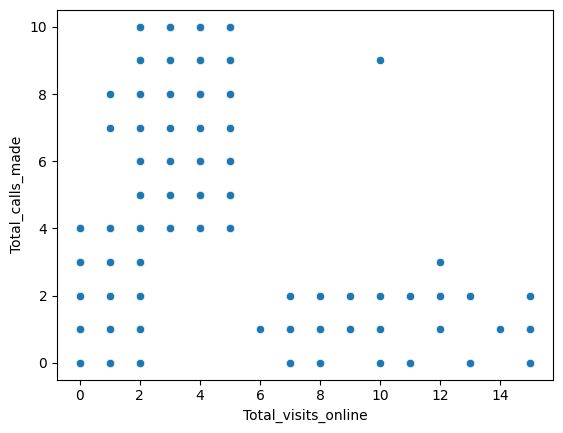

In [29]:
#This command is used to avoid creating separate commands for each scatter plot.
variables = df.columns

#Create scatter plots for variable pairs
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        sns.scatterplot(data=df, x=variables[i], y=variables[j])

        #Adjust axis labels
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])

        plt.show()

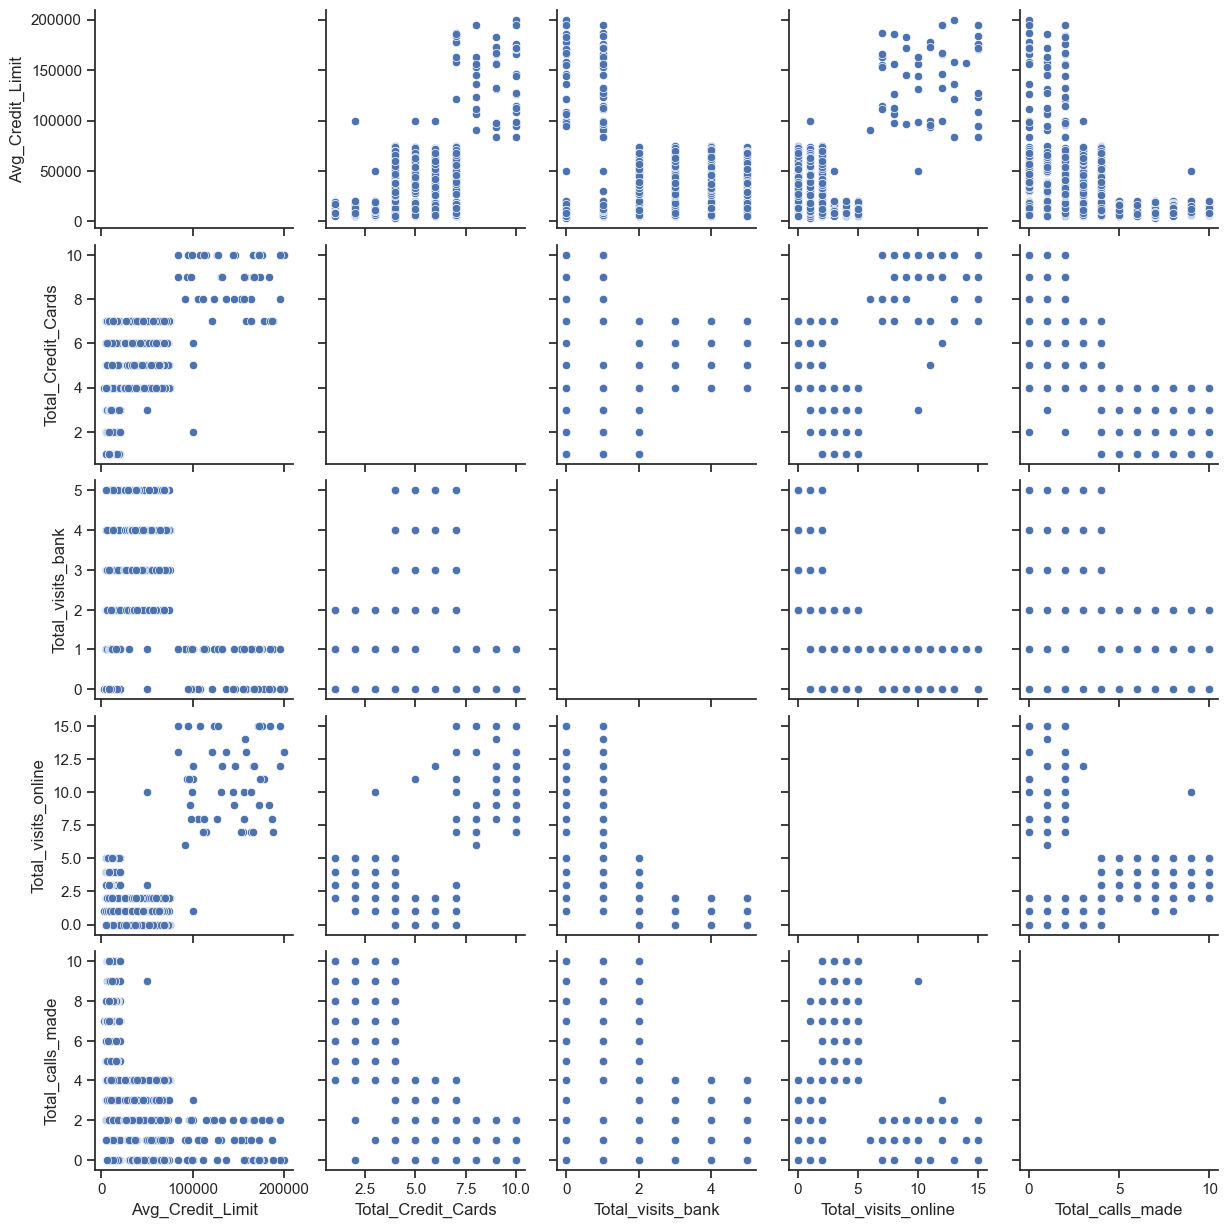

In [ ]:
#Create scatter plots without histograms
sns.set(style="ticks")
sns.pairplot(df, diag_kind="none")
plt.show()

<span style="color:blue">Scatter plots with plotly

In [31]:
#This command is used to avoid creating separate commands for each scatter plot.
variables = df.columns

#Create scatter plots for variable pairs
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        fig = px.scatter(df, x=variables[i], y=variables[j], title=f"Correlation between {variables[i]} and {variables[j]}")
        fig.show()

In [32]:
#Create scatter matrix plot for all variable pairs
fig = px.scatter_matrix(df)
fig.show()

<span style="color:blue">Plots for categorical variables with seaborn

In [ ]:
##Prints a plot for categorical variables with values 0 and 1, with different syntax but same result
#sns.catplot(x="...", y="...", data=df);
#sns.catplot(x="", y="", data=df, kind="swarm");
#sns.swarmplot(x="", y="", data=df);


##Prints Violin plot for categorical variables, similar to a boxplot with density added
#sns.violinplot(x="", y="", data=df);

##Prints Boxplot
#sns.boxplot(x="", y="", data=df).set(title="");

<span style="color:blue">Create plots for categorical variables with plotly

In [ ]:
#Prints scatter plots for the dataset's categorical variables for comparison. Usually not sufficient for small differences.
##px.scatter(df, x="", y="", facet_col="", color="", facet_col_spacing=0.01, height=400, width=800))

# <span style="color:yellow">Descriptive statistics of mean and median of variables grouped by number of credit cards

<span style="color:blue">Mean of variables grouped by number of credit cards

In [35]:
#Gives the mean of Avg_Credit_Limit for each number of credit cards
df.groupby('Total_Credit_Cards', as_index=False)['Avg_Credit_Limit'].mean()

,Total_Credit_Cards,Avg_Credit_Limit
0,1,11457.63
1,2,13187.50
2,3,13301.89
3,4,26311.26
4,5,34689.19
5,6,33205.13
6,7,44495.05
7,8,139454.55
8,9,140090.91
9,10,136842.11


In [36]:
#Gives the mean of Total_visits_bank for each number of credit cards
df.groupby('Total_Credit_Cards', as_index=False)['Total_visits_bank'].mean()

,Total_Credit_Cards,Total_visits_bank
0,1,0.93
1,2,0.92
2,3,0.87
3,4,2.77
4,5,3.26
5,6,3.56
6,7,3.21
7,8,0.64
8,9,0.73
9,10,0.63


In [37]:
#Gives the mean of Total_visits_online for each number of credit cards
df.groupby('Total_Credit_Cards', as_index=False)['Total_visits_online'].mean()

,Total_Credit_Cards,Total_visits_online
0,1,3.49
1,2,3.53
2,3,3.70
3,4,1.73
4,5,1.22
5,6,1.16
6,7,1.58
7,8,9.27
8,9,11.27
9,10,11.53


In [38]:
#Gives the mean of Total_calls_made for each number of credit cards
df.groupby('Total_Credit_Cards', as_index=False)['Total_calls_made'].mean()

,Total_Credit_Cards,Total_calls_made
0,1,7.22
1,2,6.52
2,3,6.64
3,4,3.53
4,5,2.14
5,6,1.91
6,7,2.10
7,8,0.82
8,9,1.27
9,10,1.05


<span style="color:blue">Median of variables grouped by number of credit cards

In [39]:
#Gives the median of Avg_Credit_Limit for each number of credit cards
df.groupby('Total_Credit_Cards', as_index=False)['Avg_Credit_Limit'].median()

,Total_Credit_Cards,Avg_Credit_Limit
0,1,11000.0
1,2,11500.0
2,3,13000.0
3,4,17000.0
4,5,33000.0
5,6,26000.0
6,7,38000.0
7,8,145000.0
8,9,156000.0
9,10,127000.0


In [40]:
#Gives the median of Total_visits_bank for each number of credit cards
df.groupby('Total_Credit_Cards', as_index=False)['Total_visits_bank'].median()

,Total_Credit_Cards,Total_visits_bank
0,1,1.0
1,2,1.0
2,3,1.0
3,4,3.0
4,5,3.0
5,6,3.0
6,7,3.0
7,8,1.0
8,9,1.0
9,10,1.0


In [41]:
#Gives the median of Total_visits_online for each number of credit cards
df.groupby('Total_Credit_Cards', as_index=False)['Total_visits_online'].median()

,Total_Credit_Cards,Total_visits_online
0,1,4.0
1,2,4.0
2,3,4.0
3,4,2.0
4,5,1.0
5,6,1.0
6,7,1.0
7,8,8.0
8,9,11.0
9,10,12.0


In [42]:
#Gives the median of Total_calls_made for each number of credit cards
df.groupby('Total_Credit_Cards', as_index=False)['Total_calls_made'].median()

,Total_Credit_Cards,Total_calls_made
0,1,7.0
1,2,6.5
2,3,6.0
3,4,3.0
4,5,2.0
5,6,2.0
6,7,2.0
7,8,1.0
8,9,2.0
9,10,1.0


<span style="color:blue">Plots of variables grouped by number of credit cards

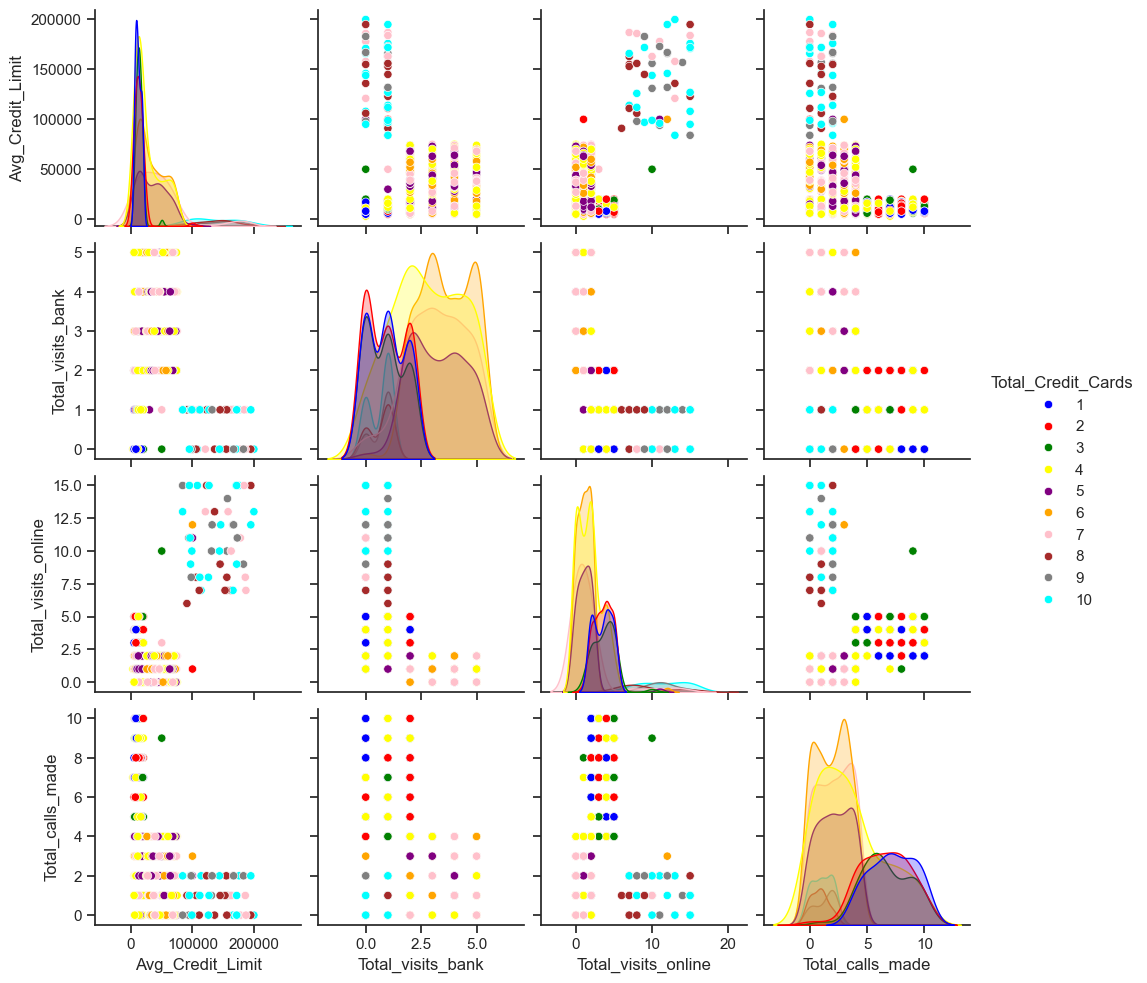

In [ ]:
#This command suppresses any warning that appears during program execution
warnings.filterwarnings('ignore', category=FutureWarning)

#Gives all scatter plots for variable pairs grouped by number of credit cards
sns.pairplot(data=df, hue='Total_Credit_Cards', palette=['Blue', 'Red', 'Green', 'Yellow', 'Purple', 'Orange', 'Pink', 'Brown', 'Gray', 'Cyan']);

In [44]:
#Creates a new column 'Credit_Card_Group' categorizing 'Total_Credit_Cards' values as '<5' and '5+'.
df['Credit_Card_Group'] = np.where(df['Total_Credit_Cards'] < 5, '<5', '5+')


#Creates a subplot with two columns for presenting the plots.
fig = make_subplots(rows=1, cols=2, horizontal_spacing=False, shared_yaxes=True)


#Adds the first boxplot for 'Avg_Credit_Limit' where 'Credit_Card_Group' is '<5'.
fig.append_trace(go.Box(y=df[df['Credit_Card_Group']=='<5']['Avg_Credit_Limit'],
                        name='<5', boxpoints='all'), row=1, col=1)


#Adds the second boxplot for 'Avg_Credit_Limit' where 'Credit_Card_Group' is '5+'.
fig.append_trace(go.Box(y=df[df['Credit_Card_Group']=='5+']['Avg_Credit_Limit'],
                        name='5+', boxpoints='all'), row=1, col=2)


#Updates the plot layout with title, background color, axis settings, and dimensions.
fig.update_layout(title='Analysis for different Total_Credit_Cards values:',
                 plot_bgcolor='#fff',
                 yaxis=dict(showticklabels=False),
                 height=400, width=600,
                 ).update_layout(margin=dict(t=60, l=5, r=0, b=15))


#Adds annotation to the plot.
fig.add_annotation(x=0.5, y=1.1, text='<b>Annotation text</b>',
                   xref='paper', yref='paper', showarrow=False)

#Shows the plot
fig.show()

In [45]:
#Creates a 3D scatter plot with plotly
fig = go.Figure(data=[go.Scatter3d(
    x=df['Avg_Credit_Limit'], #Ορίζει τον άξονα x με τις τιμές της στήλης 'Avg_Credit_Limit'
    y=df['Total_visits_bank'], #Ορίζει τον άξονα y με τις τιμές της στήλης 'Total_visits_bank'
    z=df['Total_visits_online'], #Ορίζει τον άξονα z με τις τιμές της στήλης 'Total_visits_online'
    mode='markers', #Ορίζει τον τρόπο παρουσίασης των δεδομένων ως σημεία
    marker=dict(
        size=12, #Ορίζει το μέγεθος των σημείων
        color=df['Total_Credit_Cards'], #Ορίζει το χρώμα των σημείων με βάση τις τιμές της στήλης 'Total_Credit_Cards'
        colorscale='Viridis', #Ορίζει το χρωματικό εύρος των σημείων
        opacity=0.9 #Ορίζει τη διαφάνεια των σημείων
    )
)])

#Sets the plot layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

#Shows the plot
fig.show()

# <span style="color:yellow">COMMENTS ON DATA PROCESSING AND ANALYSIS


<span style="color:blue">DESCRIPTIVE STATISTICS:

<span style="color:blue">1. The credit card customer dataset contains 660 observations with information about credit card limits, number of credit cards, and customer interaction with the bank.

<span style="color:blue">2. Avg_Credit_Limit: The mean value is 34,574.24 units, with a standard deviation of 37,625.49, indicating significant variation in credit card limits among customers.

<span style="color:blue">3. Total_Credit_Cards: The mean is about 4.71 cards, with a standard deviation of 2.17, showing most customers have between 2 and 7 credit cards.

<span style="color:blue">4. Total_visits_bank: The mean is 2.40 visits, with a standard deviation of 1.63. Many customers visit the bank a few times a year, while some do not visit at all.

<span style="color:blue">5. Total_visits_online: The mean is 2.61 visits, with a standard deviation of 2.94, showing customers prefer to use the bank's online services.

<span style="color:blue">6. Total_calls_made: The mean is 3.58 calls, with a standard deviation of 2.87, indicating phone service is also important for customers.

<span style="color:blue">PLOTS:

<span style="color:blue">1. Histograms reveal the distributions of numeric variables. The distribution of Avg_Credit_Limit is skewed, with most customers having low credit limits and a few having extremely high limits. This shows most customers have limited credit, while a small group enjoys high limits. Total_Credit_Cards also shows an interesting distribution, with most customers holding 3-5 cards, indicating a preference for managing multiple accounts.

<span style="color:blue">2. Bar plots for Total_visits_bank, Total_visits_online, and Total_calls_made reveal the frequency of customer interactions with the bank. Most customers visit the bank and make phone calls rarely, with most visits and calls ranging from 1 to 3 per year. In contrast, online visits vary more, showing a growing preference for online transactions.

<span style="color:blue">3. Scatter plots provide a detailed look at the spread of variable values for each customer. These plots help identify outliers, such as customers with extremely high credit limits or multiple visits. For example, scatter plots reveal some customers have very high Avg_Credit_Limit, while most maintain limits near the average. Similarly, scatter plots of Total_visits_online show some customers interact more with the bank online.

<span style="color:blue">4. The correlation matrix shows a positive correlation between the number of credit cards (Total_Credit_Cards) and the average credit limit (Avg_Credit_Limit). This suggests customers with more credit cards tend to have higher credit limits. Additionally, correlations show total bank visits and calls made do not have strong relationships with credit limits or number of cards.

# <span style="color:yellow">K-Means Clustering

In [ ]:
#Creates the X table with variables for the K-Means algorithm
X = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_calls_made', 'Total_visits_bank', 'Total_visits_online']]

In [47]:
#Displays the first 3 rows of the X table
X.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_calls_made,Total_visits_bank,Total_visits_online
0,100000,2,0,1,1
1,50000,3,9,0,10
2,50000,7,4,1,3


In [ ]:
#Prints the X table
model = KMeans(n_clusters=5, random_state=0)

In [49]:
#Displays the created model
model

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [ ]:
#Trains the model
fitted_kmeans = model.fit(X)

In [ ]:
#Uses the trained K-Means model to predict the group of each sample in the X table
y_pred = fitted_kmeans.predict(X)

In [ ]:
#Creates a K-Means model with 5 clusters, trains it on the X table data, and predicts the cluster for each sample. The prediction result is stored in y_pred.
y_pred = KMeans(n_clusters=5).fit_predict(X)

In [53]:
#Prints the y_pred table
y_pred

array([1, 4, 4, 4, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
#Inserts a new observation into the model
new_observation = pd.DataFrame([[60000, 6, 3, 2, 5]], 
                               columns=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_calls_made', 'Total_visits_bank', 'Total_visits_online'])

#Introduces the new observation into the model
new_observation_pred = fitted_kmeans.predict(new_observation)

#Converts the new observation to DataFrame
new_observation_as_a_df = pd.DataFrame(new_observation, columns=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_calls_made', 'Total_visits_bank', 'Total_visits_online'])

#Inserts the new observation into DataFrame
df = pd.concat([df, new_observation_as_a_df],ignore_index= True)

#Displays the cluster of the new observation
new_observation_pred

array([2], dtype=int32)

In [55]:
#Converts the new observation to DataFrame
new_observation_as_a_df = pd.DataFrame(
    new_observation, columns=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_calls_made', 'Total_visits_bank', 'Total_visits_online'])

#Predicts the cluster of the new observation
fitted_kmeans.predict(new_observation_as_a_df)

array([2], dtype=int32)

In [56]:
#Creates a new 'cluster' column in the df table with the K-Means model predictions
df["cluster"] = pd.DataFrame(y_pred, columns=["cluster"])

#Sets the 'cluster' column as categorical
df["cluster"] = df["cluster"].astype('category')

#Prints the first 10 rows of the df table
df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Card_Group,cluster
0,100000,2,1,1,0,<5,1.0
1,50000,3,0,10,9,<5,4.0
2,50000,7,1,3,4,5+,4.0
3,30000,5,1,1,4,5+,4.0
4,100000,6,0,12,3,5+,1.0
5,20000,3,0,1,8,<5,0.0
6,100000,5,0,11,2,5+,1.0
7,15000,3,0,1,1,<5,0.0
8,5000,2,0,2,2,<5,0.0
9,3000,4,0,1,7,<5,0.0


In [57]:
#Displays the number of observations in each cluster
df.groupby('cluster', observed=True).size()

cluster
0.0    391
1.0     22
2.0     27
3.0     99
4.0    121
dtype: int64

In [58]:
df["cluster"] = pd.DataFrame(y_pred, columns=["cluster"])
numeric_cols = df.select_dtypes(include=[np.number])
mean_values = numeric_cols.groupby('cluster').mean()
mean_values

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
cluster,,,,,
0.0,12150.90,3.72,2.08,2.44,4.74
1.0,109863.64,8.45,0.64,10.23,1.18
2.0,169148.15,8.67,0.56,10.85,0.96
3.0,64676.77,5.59,3.19,1.11,2.00
4.0,38685.95,5.60,3.53,1.15,2.16


#  <span style="color:yellow">Διαγράμματα της μεθόδου K-Means 

<span style="color:blue">Διάγραμμα διασποράς 2D για την απεικόνιση των clusters

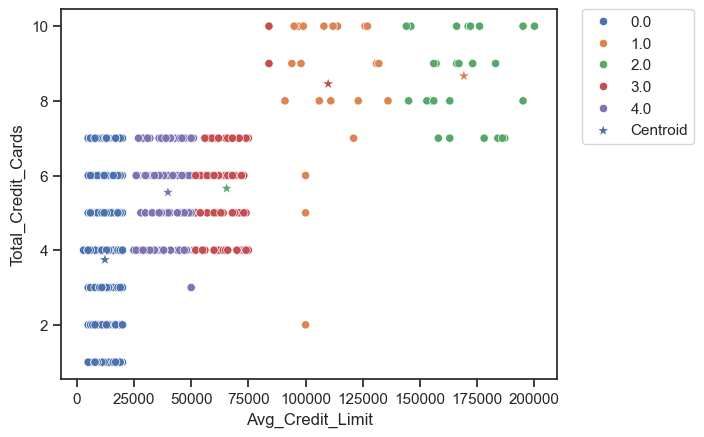

In [59]:
# Σχεδιάζει τα Clusters με τα κέντρα τους 
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', hue="cluster",
                data=df, palette="deep")

# Σχεδιάζει τα κέντρα των Clusters
sns.scatterplot(x=fitted_kmeans.cluster_centers_[:, 0],
                y=fitted_kmeans.cluster_centers_[:, 1],
                s=100, c=sns.color_palette("deep", 5),
                label='Centroid', marker='*')

# Τοποθετεί τη λεζάντα έξω από το διάγραμμα για καλύτερη ορατότητα των δεδομένων
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

<span style="color:blue">Διάγραμμα διασποράς 3D για την απεικόνιση των clusters

In [60]:
#Τρισδιάστατο διάγραμμα με τα clusters
three_dim_clusters = px.scatter_3d(
    df, x='Avg_Credit_Limit', y='Total_Credit_Cards', z="Total_visits_bank", color="cluster",
    height=600, width=600,
    color_discrete_map={0: "blue", 1:"purple", 2:"green", 3:"black", 4:"red"}
).update_layout(margin=dict(t=40, l=40, r=40, b=40))

three_dim_clusters.show()

# save to file, use everywhere with a browser
#three_dim_clusters.write_html("three_dim_customers.html")

# <span style="color:yellow">Η μέθοδος Elbow

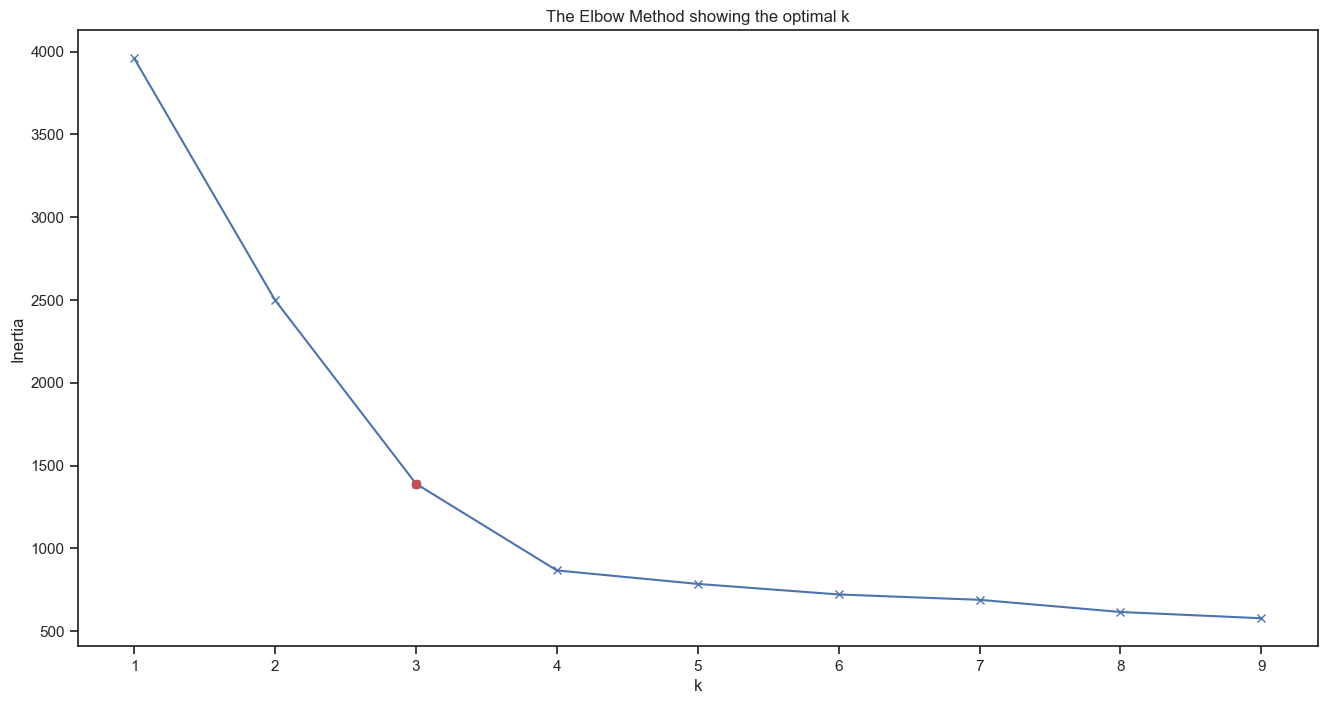

In [62]:
#Αφαιρούμε τις στήλες που δεν είναι αριθμητικές
df = df.select_dtypes(include=['int64', 'float64'])

df = df.dropna()  # αφαιρεί γραμμές με NaN
# Εναλλακτικά, μπορείς να συμπληρώσεις με τον μέσο όρο:
# df = df.fillna(df.mean())


#Κανονικοποίηση των δεδομένων
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Εφαρμογή της μεθόδου K-Means για διάφορες τιμές του k
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertia.append(kmeanModel.inertia_)
    
#Υπολογισμός της πρώτης παραγώγου της αδράνειας
diffs = np.diff(inertia)
    
#Υπολογισμός της δεύτερης παραγώγου της αδράνειας
diffs2 = np.diff(diffs)

#Εύρεση του ιδανικού k ως το σημείο με τη μεγαλύτερη δεύτερη παράγωγο
ideal_k = np.argmax(diffs2) + 2  # +2 επειδή οι διαφορές είναι μικρότερες κατά 1 από τον αρχικό πίνακα και οι δείκτες ξεκινούν από το 0

#Σχεδίαση του γραφήματος Elbow με το ιδανικό k σημειωμένο με κόκκινο χρώμα
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.plot(ideal_k, inertia[ideal_k-1], 'ro')  # -1 επειδή οι δείκτες ξεκινούν από το 0
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# <span style="color:yellow">Mέθοδος Silouette για τον προσδιορισμό του ιδανικού αριθμού των clusters

In [63]:
silhouette_scores_list = []
for clusters_number in range(2, 15):  # Silhouette starts from 2 clusters.
    model = KMeans(n_clusters=clusters_number, random_state=0)
    clusters = model.fit_predict(X)
    silhouette_metric_score = silhouette_score(X, clusters)
    silhouette_scores_list.append(silhouette_metric_score)
    print(
        f"For clusters={clusters_number}, the average silhouette_score is: {silhouette_metric_score}")

For clusters=2, the average silhouette_score is: 0.7741723120010261
For clusters=3, the average silhouette_score is: 0.716152112148899
For clusters=4, the average silhouette_score is: 0.7161946076996266
For clusters=5, the average silhouette_score is: 0.7094686798667933
For clusters=6, the average silhouette_score is: 0.5942207440954325
For clusters=7, the average silhouette_score is: 0.5900390786885644
For clusters=8, the average silhouette_score is: 0.6112000225098506
For clusters=9, the average silhouette_score is: 0.6109850315611671
For clusters=10, the average silhouette_score is: 0.6042903053219519
For clusters=11, the average silhouette_score is: 0.6037188433010545
For clusters=12, the average silhouette_score is: 0.6195173369103755
For clusters=13, the average silhouette_score is: 0.6006141263464903
For clusters=14, the average silhouette_score is: 0.6040679158749983


In [64]:
#Διαφορά των σκορ μεταξύ 3 και 5 clusters σε ποσοστιαία βάση
((0.716-0.709)/0.709) * 100

0.9873060648801137

# <span style="color:yellow">Εφαρμογή του Κ-Means με τον ιδανικό αριθμό των clusters απο τη μέθοδο Elbow

In [ ]:
#Creates the X table with variables for the K-Means algorithm
X = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_calls_made', 'Total_visits_bank', 'Total_visits_online']]

In [66]:
#Displays the first 3 rows of the X table
X.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_calls_made,Total_visits_bank,Total_visits_online
0,100000,2,0,1,1
1,50000,3,9,0,10
2,50000,7,4,1,3


In [ ]:
#Prints the X table
model = KMeans(n_clusters=3, random_state=0)

In [68]:
#Displays the created model
model

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [ ]:
#Trains the model
fitted_kmeans = model.fit(X)

In [ ]:
#Uses the trained K-Means model to predict the group of each sample in the X table
y_pred = fitted_kmeans.predict(X)

In [ ]:
#Creates a K-Means model with 5 clusters, trains it on the X table data, and predicts the cluster for each sample. The prediction result is stored in y_pred.
y_pred = KMeans(n_clusters=3).fit_predict(X)

In [72]:
#Prints the y_pred table
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [73]:
#Creates a new 'cluster' column in the df table with the K-Means model predictions
df["cluster"] = pd.DataFrame(y_pred, columns=["cluster"])

#Sets the 'cluster' column as categorical
df["cluster"] = df["cluster"].astype('category')

#Prints the first 10 rows of the df table
df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,100000,2,1,1,0,0
1,50000,3,0,10,9,0
2,50000,7,1,3,4,0
3,30000,5,1,1,4,1
4,100000,6,0,12,3,0
5,20000,3,0,1,8,1
6,100000,5,0,11,2,0
7,15000,3,0,1,1,1
8,5000,2,0,2,2,1
9,3000,4,0,1,7,1


In [74]:
#Displays the number of observations in each cluster
df.groupby('cluster').size()

cluster
0    175
1    448
2     37
dtype: int64

In [75]:
df['cluster'].value_counts()

cluster
1    448
0    175
2     37
Name: count, dtype: int64

In [76]:
df["cluster"] = pd.DataFrame(y_pred, columns=["cluster"])
numeric_cols = df.select_dtypes(include=[np.number])
mean_values = numeric_cols.groupby('cluster').mean()
mean_values

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
cluster,,,,,
0,59611.43,5.77,3.14,1.75,2.03
1,14703.12,3.96,2.26,2.26,4.40
2,156756.76,8.73,0.62,10.84,1.00


#  <span style="color:yellow">Διαγράμματα της μεθόδου K-Means (Κ=3)

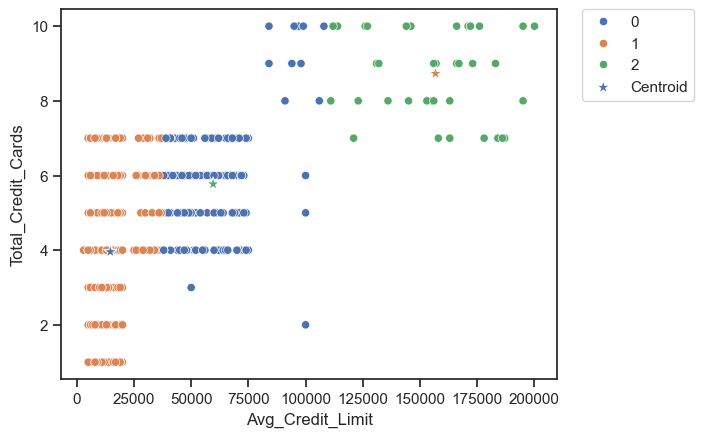

In [77]:
# Σχεδιάζει τα Clusters με τα κέντρα τους 
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', hue="cluster",
                data=df, palette="deep")

# Σχεδιάζει τα κέντρα των Clusters
sns.scatterplot(x=fitted_kmeans.cluster_centers_[:, 0],
                y=fitted_kmeans.cluster_centers_[:, 1],
                s=100, c=sns.color_palette("deep", 3),
                label='Centroid', marker='*')

# Τοποθετεί τη λεζάντα έξω από το διάγραμμα για καλύτερη ορατότητα των δεδομένων
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

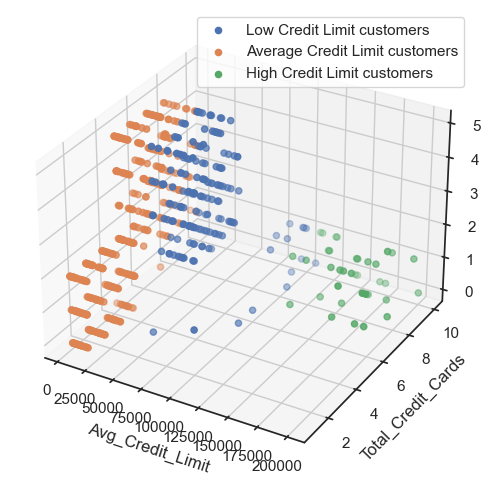

In [78]:
# Ορισμός του λεξικού για την αντιστοίχιση των ετικετών των clusters
cluster_labels = {0: "Low Credit Limit customers", 1: "Average Credit Limit customers", 2: "High Credit Limit customers"}

# Δημιουργία ενός διαγράμματος για κάθε cluster
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Ανάκτηση του αριθμού των clusters από το εκπαιδευμένο μοντέλο
num_clusters = fitted_kmeans.n_clusters

for i in range(num_clusters):
    df_cluster = df[df['cluster'] == i]
    ax.scatter(df_cluster['Avg_Credit_Limit'], df_cluster['Total_Credit_Cards'], df_cluster['Total_visits_bank'], label=cluster_labels[i])

ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_bank')
ax.legend()
plt.show()

# <span style="color:yellow">Ανάλυση των clusters μια προς μια

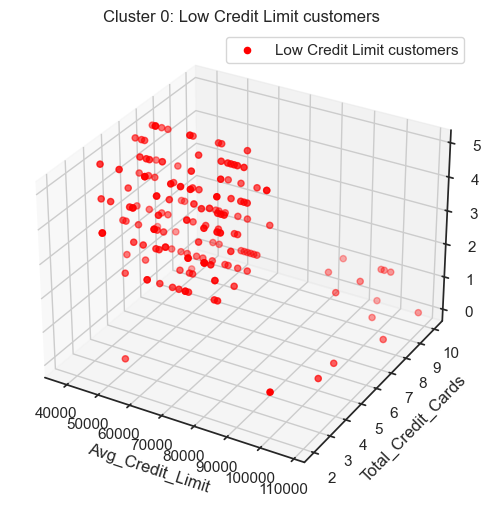

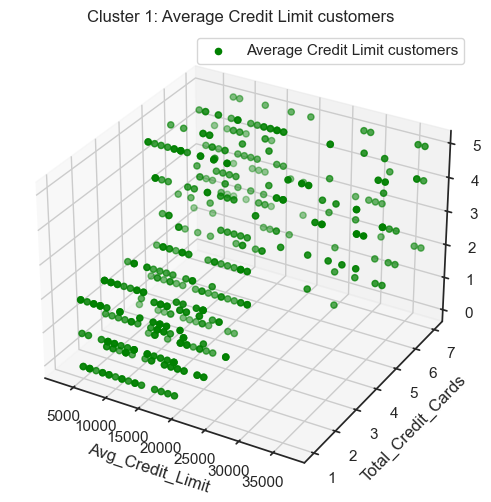

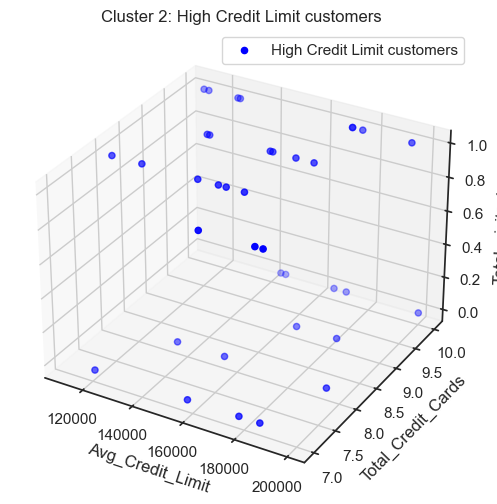

In [79]:
# Ορισμός του λεξικού για την αντιστοίχιση των ετικετών των clusters
cluster_labels = {0: "Low Credit Limit customers", 1: "Average Credit Limit customers", 2: "High Credit Limit customers"}

# Ορισμός της λίστας με τα χρώματα
colors = ['red', 'green', 'blue']

#Ανάκτηση του αριθμού των clusters από το εκπαιδευμένο μοντέλο
num_clusters = fitted_kmeans.n_clusters

# Δημιουργία ενός διαγράμματος για κάθε cluster
for i in range(num_clusters):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    df_cluster = df[df['cluster'] == i]
    ax.scatter(df_cluster['Avg_Credit_Limit'], df_cluster['Total_Credit_Cards'], df_cluster['Total_visits_bank'], color=colors[i], label=cluster_labels[i])
    ax.set_xlabel('Avg_Credit_Limit')
    ax.set_ylabel('Total_Credit_Cards')
    ax.set_zlabel('Total_visits_bank')
    ax.legend()
    plt.title(f'Cluster {i}: {cluster_labels[i]}')
    plt.show()

In [80]:
# show basic descriptive stats for cluster labeled as 0.
df[df["cluster"] == 0].describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
count,175.00,175.00,175.00,175.00,175.00,175.0
mean,59611.43,5.77,3.14,1.75,2.03,0.0
std,15593.17,1.49,1.34,2.96,1.52,0.0
min,38000.00,2.00,0.00,0.00,0.00,0.0
25%,48000.00,5.00,2.00,0.00,1.00,0.0
50%,58000.00,6.00,3.00,1.00,2.00,0.0
75%,69000.00,7.00,4.00,2.00,3.00,0.0
max,108000.00,10.00,5.00,15.00,9.00,0.0


In [81]:
# show basic descriptive stats for cluster labeled as 0.
df[df["cluster"] == 1].describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
count,448.00,448.00,448.00,448.00,448.0,448.0
mean,14703.12,3.96,2.26,2.26,4.4,1.0
std,8088.92,1.90,1.65,1.61,3.0,0.0
min,3000.00,1.00,0.00,0.00,0.0,1.0
25%,8750.00,2.00,1.00,1.00,2.0,1.0
50%,13000.00,4.00,2.00,2.00,4.0,1.0
75%,18000.00,6.00,4.00,4.00,7.0,1.0
max,37000.00,7.00,5.00,5.00,10.0,1.0


In [82]:
# show basic descriptive stats for cluster labeled as 0.
df[df["cluster"] == 2].describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
count,37.00,37.00,37.00,37.00,37.00,37.0
mean,156756.76,8.73,0.62,10.84,1.00,2.0
std,24955.97,1.15,0.49,2.91,0.85,0.0
min,111000.00,7.00,0.00,7.00,0.00,2.0
25%,136000.00,8.00,0.00,8.00,0.00,2.0
50%,158000.00,9.00,1.00,11.00,1.00,2.0
75%,173000.00,10.00,1.00,13.00,2.00,2.0
max,200000.00,10.00,1.00,15.00,2.00,2.0


# <span style="color:yellow">RFM Analysis

In [84]:
#Εισαγωγή του αρχικού dataset
df_original = pd.read_csv('data/Credit Card Customer Data.csv')

#Επαναφορά της στήλης 'Customer Key'
customer_key_column = df_original['Customer Key']

In [85]:
#Υπολογισμός του Recency
recency_data = pd.DataFrame()
recency_data['Customer Key'] = df_original['Customer Key']
recency_data['Recency'] = [10] * len(recency_data)

#Αφαίρεση των διπλότυπων εγγραφών
recency_data = recency_data.drop_duplicates(subset = "Customer Key")

#Προβολή των εγγραφών του recency_data
recency_data

,Customer Key,Recency
0,87073,10
1,38414,10
2,17341,10
3,40496,10
4,47437,10
...,...,...
655,51108,10
656,60732,10
657,53834,10
658,80655,10


In [86]:
#Υπολογισμός του Frequency
frequency_data = pd.DataFrame()
frequency_data['Customer Key'] = df_original['Customer Key']
frequency_data['Frequency'] = df_original['Total_visits_bank'] + df_original['Total_visits_online'] + df_original['Total_calls_made']

#Αφαίρεση των διπλότυπων εγγραφών
frequency_data = frequency_data.drop_duplicates(subset = "Customer Key")

#Προβολή των εγγραφών του frequency_data
frequency_data

,Customer Key,Frequency
0,87073,2
1,38414,19
2,17341,8
3,40496,6
4,47437,15
...,...,...
655,51108,11
656,60732,16
657,53834,11
658,80655,16


In [87]:
#Υπολογισμός του Monetary
monetary_data = pd.DataFrame()
monetary_data['Customer Key'] = df_original['Customer Key']
monetary_data['Monetary'] = df_original['Avg_Credit_Limit']

#Αφαίρεση των διπλότυπων εγγραφών
monetary_data = monetary_data.drop_duplicates(subset = "Customer Key")

#Προβολή των εγγραφών του monetary_data
monetary_data

,Customer Key,Monetary
0,87073,100000
1,38414,50000
2,17341,50000
3,40496,30000
4,47437,100000
...,...,...
655,51108,99000
656,60732,84000
657,53834,145000
658,80655,172000


In [88]:
#Συνένωση των recency_data, frequency_data και monetary_data
recency_frequency_data = recency_data.merge(frequency_data, on = 'Customer Key')
merged_data = recency_frequency_data.merge(monetary_data, on = 'Customer Key')

#Προβολή των εγγραφών του merged_data
merged_data

,Customer Key,Recency,Frequency,Monetary
0,87073,10,2,100000
1,38414,10,19,50000
2,17341,10,8,50000
3,40496,10,6,30000
4,47437,10,15,100000
...,...,...,...,...
650,51108,10,11,99000
651,60732,10,16,84000
652,53834,10,11,145000
653,80655,10,16,172000


In [89]:
#Υπολογισμός των R, F και M ranks
merged_data['R_rank'] = merged_data['Recency'].rank(ascending = False)
merged_data['F_rank'] = merged_data['Frequency'].rank(ascending = True)
merged_data['M_rank'] = merged_data['Monetary'].rank(ascending = True)

#Προβολή των εγγραφών του merged_data
merged_data

,Customer Key,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,87073,10,2,100000,328.0,6.5,616.0
1,38414,10,19,50000,328.0,655.0,503.5
2,17341,10,8,50000,328.0,315.0,503.5
3,40496,10,6,30000,328.0,159.0,408.5
4,47437,10,15,100000,328.0,627.0,616.0
...,...,...,...,...,...,...,...
650,51108,10,11,99000,328.0,500.0,614.0
651,60732,10,16,84000,328.0,644.0,606.5
652,53834,10,11,145000,328.0,500.0,631.0
653,80655,10,16,172000,328.0,644.0,645.5


In [90]:
#Κανονικοποίηση των R, F και M ranks
merged_data['R_rank_norm'] = (merged_data['R_rank'] / merged_data['R_rank'].max())*100
merged_data['F_rank_norm'] = (merged_data['F_rank'] / merged_data['F_rank'].max())*100
merged_data['M_rank_norm'] = (merged_data['F_rank'] / merged_data['M_rank'].max())*100
merged_data.drop(columns = ['R_rank', 'F_rank', 'M_rank'], inplace = True)

#Προβολή των εγγραφών του merged_data
merged_data

,Customer Key,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,87073,10,2,100000,100.0,0.99,0.99
1,38414,10,19,50000,100.0,100.00,100.00
2,17341,10,8,50000,100.0,48.09,48.09
3,40496,10,6,30000,100.0,24.27,24.27
4,47437,10,15,100000,100.0,95.73,95.73
...,...,...,...,...,...,...,...
650,51108,10,11,99000,100.0,76.34,76.34
651,60732,10,16,84000,100.0,98.32,98.32
652,53834,10,11,145000,100.0,76.34,76.34
653,80655,10,16,172000,100.0,98.32,98.32


In [91]:
#Υπολογισμός του RFM Score
merged_data['RFM Score'] = 0.15 * merged_data['R_rank_norm'] + 0.28 * merged_data['F_rank_norm'] + 0.57 * merged_data['M_rank_norm']

#Αναγωγή του RFM Score στο διάστημα [1, 5]
merged_data['RFM Score'] *= 0.05

#Προβολή του final_data
final_data = merged_data[['Customer Key', 'RFM Score']]

#Προβολή των πρώτων δέκα εγγραφών του final_data
final_data.head(10)

,Customer Key,RFM Score
0,87073,0.79
1,38414,5.00
2,17341,2.79
3,40496,1.78
4,47437,4.82
5,58634,3.24
6,48370,4.43
7,37376,0.79
8,82490,1.06
9,44770,2.79


In [92]:
#Ορισμός των bins και labels
bins = [0, 1.6, 3, 4, 4.5, np.inf]
labels = ['Lost Customers', 'Low Value Customers', 'Medium Value Customer', 'High value Customer', 'Top Customers']

#Προσθήκη της στήλης 'Customer Segment' στο final_data
final_data_result = final_data.copy()
final_data_result['Customer Segment'] = pd.cut(final_data_result['RFM Score'], bins=bins, labels=labels, right=False)

#Προβολή των πρώτων 10 εγγραφών του final_data_result
final_data_result

,Customer Key,RFM Score,Customer Segment
0,87073,0.79,Lost Customers
1,38414,5.00,Top Customers
2,17341,2.79,Low Value Customers
3,40496,1.78,Low Value Customers
4,47437,4.82,Top Customers
...,...,...,...
650,51108,3.99,Medium Value Customer
651,60732,4.93,Top Customers
652,53834,3.99,Medium Value Customer
653,80655,4.93,Top Customers


#  <span style="color:yellow">Διαγράμματα της RFM Analysis

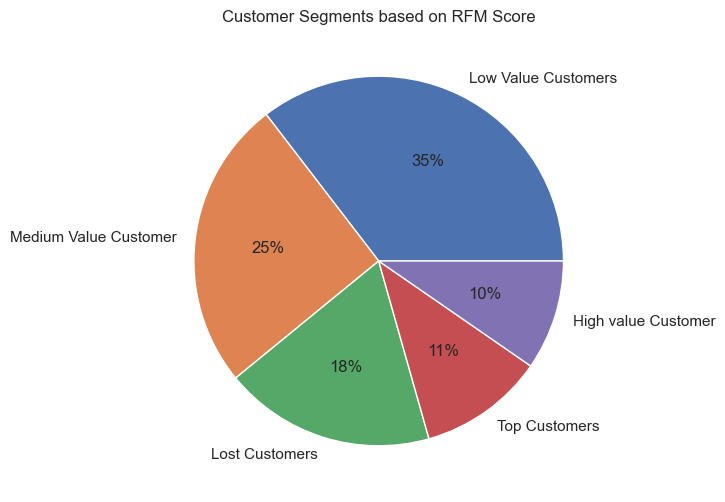

In [93]:
#Διάγραμμα πίτας για τα Customer Segments
plt.figure(figsize = (6, 6))
plt.pie(final_data_result['Customer Segment'].value_counts(), labels = final_data_result['Customer Segment'].value_counts().index,
        autopct = '%.0f%%')
plt.title('Customer Segments based on RFM Score')
plt.show()